In [1]:
from time import time
import numpy as np
import sympy as sp
from Genetic import Population
import matplotlib.pyplot as plt

# Пример работы

### Задаем функцию

In [2]:
x=sp.Symbol('x')
func = abs(x**2-100*x-1000)

func

Abs(-x**2 + 100*x + 1000)

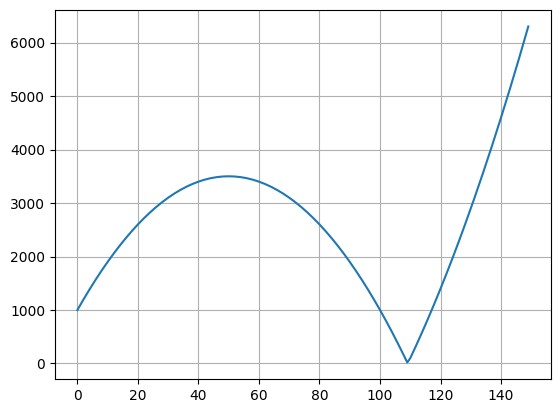

In [3]:
xx = np.arange(150)
yy = np.array([func.subs(x,i) for i in xx])
#display(yy)
plt.plot(xx,yy)
plt.grid(True)
plt.show()


### Поиск минимума

x = -9, y = 19


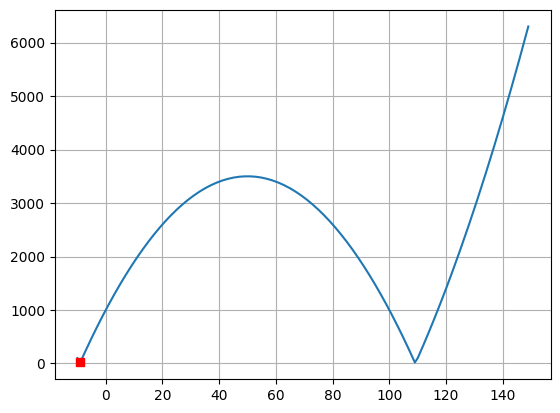

In [4]:
find_min=Population(func, -10, 150, metod="min")
for _ in range(100):
    find_min.next_population()
out = find_min.get_winner()
print(f'x = {out}, y = {func.subs(x, out)}')
xx = np.arange(-10, 150)
yy = np.array([func.subs(x,i) for i in xx])
plt.plot(xx,yy)
plt.grid(True)
plt.plot(out, func.subs(x, out), 'rs')
plt.show()

Так как минимума два, находит разные при нескольких запусках.  
Надо добавить реализацию в класс для всех значений

In [5]:
print(find_min)

Function: Abs(-x**2 + 100*x + 1000)
Range: -10 : 150
Size population: 12
Population:
Specimen 0 bin: -0001001 int: -9
Specimen 1 bin: 01101010 int: 106
Specimen 2 bin: -0000011 int: -3
Specimen 3 bin: -0000010 int: -2
Specimen 4 bin: 00000111 int: 7
Specimen 5 bin: 01111100 int: 124
Specimen 6 bin: 01011000 int: 88
Specimen 7 bin: 01010110 int: 86
Specimen 8 bin: 00111111 int: 63
Specimen 9 bin: 00101000 int: 40
Specimen 10 bin: 00111011 int: 59
Specimen 11 bin: 00101001 int: 41



### Поиск Максимума

x = 150, y = 6500


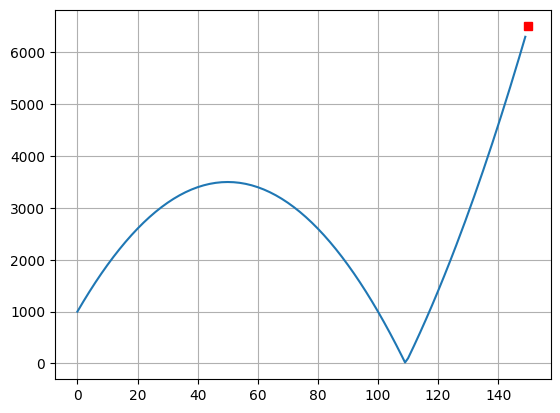

In [6]:
find_max=Population(func, 0, 150, metod="max")
for _ in range(100):
    find_max.next_population()
out = find_max.get_winner()
print(f'x = {out}, y = {func.subs(x, out)}')
xx = np.arange(150)
yy = np.array([func.subs(x,i) for i in xx])
plt.plot(xx,yy)
plt.grid(True)
plt.plot(out, func.subs(x, out), 'rs')
plt.show()


Из графика видно что получили правый предел иследованния.  
Изменим диапазон, и заодно проверим на какой итерации находит верное решение.

x = 50, y = 3500
Решение найдено на 5 итерации


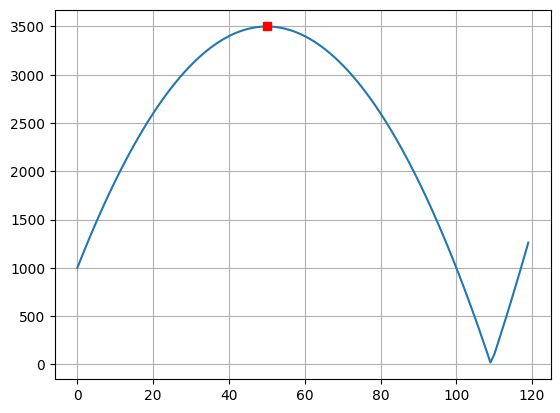

In [7]:
find_max=Population(func, 0, 120, metod="max")
count = 0
old_winner = find_max.get_winner()
for _ in range(100):    
    find_max.next_population()
    if find_max.get_winner() == old_winner:
        count += 1
    else:
        old_winner = find_max.get_winner()
        count = 0
out = find_max.get_winner()
print(f'x = {out}, y = {func.subs(x, out)}')
print(f'Решение найдено на {100 - count} итерации')
xx = np.arange(120)
yy = np.array([func.subs(x,i) for i in xx])
plt.plot(xx,yy)
plt.grid(True)
plt.plot(out, func.subs(x, out), 'rs')
plt.show()

### Сравним методы решения по времени

In [10]:
t1 = time()
y = []
for i in range(120):
    y.append(abs(i**2-100*i-1000))
print(f'Перебор: {max(y)} Время: {time() - t1}c')
t2 = time()
x=sp.Symbol('x')
func = abs(x**2-100*x-1000)
xx = np.arange(120)
yy = np.array([func.subs(x, i) for i in xx])
print(f"Sympy: {max(yy)} Время: {time() - t2}c")
t3 = time()
find_max=Population(func, 0, 120, metod="max")
for _ in range(50):    
    find_max.next_population()
p = find_max.get_winner()
print(f'Ген подбор: {abs(p**2-100*p-1000)} Время: {time() - t3}c')

Перебор: 3500 Время: 0.0009872913360595703c
Sympy: 3500 Время: 0.0040111541748046875c
Ген подбор: 3500 Время: 0.024971961975097656c


Обычный перебор, самое быстрое решение